#### trtansformation of features
why transformation of features are required?
1. linear reg ----gradient descent----global minima
2. algorithms like KNN, k means, hierarichal clustering---works on eucledian distance

Deep learning techniques
1. ANN----GLobal minima, Gradient descent
2. CNN
3. RNN

# standardization
we try to bring all te variable and feature to a similar scale
standardization means centring the variable to zero

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

#### standardization : we use the standardscalar from sklearn lib

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler() #creating object
df_scaled = scaler.fit_transform(df)

In [16]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [26]:
import matplotlib.pyplot as plt

In [18]:
df_scaled.columns = ['Survived','Pclass','Age','Fare']

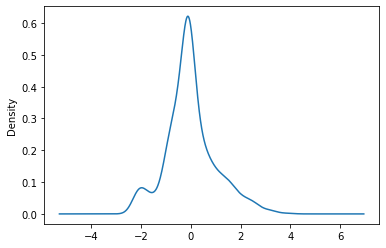

In [19]:
df_scaled['Age'].plot(kind = 'kde')

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

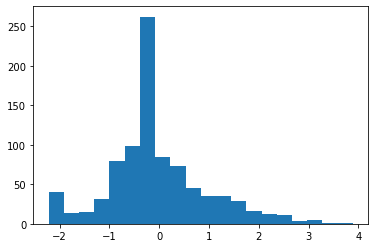

In [20]:
plt.hist(df_scaled['Age'], bins = 20)

## min max scaling

values between 0 to 1. works well with DL (CNN)

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [22]:
min_max = MinMaxScaler()
df = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)


In [24]:
df.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

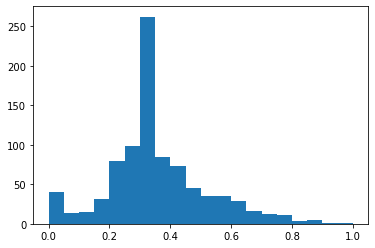

In [27]:
plt.hist(df['Age'], bins = 20)

### robust scaler

IQR = 75th % - 25th%.....
x_scaled = (X-X.median)/IQR

In [34]:
from sklearn.preprocessing import RobustScaler
df = pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df['Age'].fillna(df['Age'].median(), inplace=True)

In [35]:
scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [37]:
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

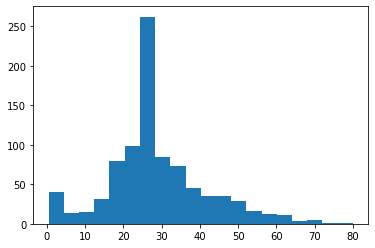

In [38]:
plt.hist(df['Age'], bins=20)

# gaussian transformation
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation
- boxcox transformation

some machine learning algorithms like linear and logistic assume that the data is normally distributed

if you want to check if the data is normally distributed we use QQ plot

In [42]:
import scipy.stats as stat
import pylab

In [43]:
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.hist(df[feature])
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm',plot=pylab)
    

In [46]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
df['Age'].fillna(df['Age'].median(), inplace=True)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,28.0,23.4500
889,1,26.0,30.0000


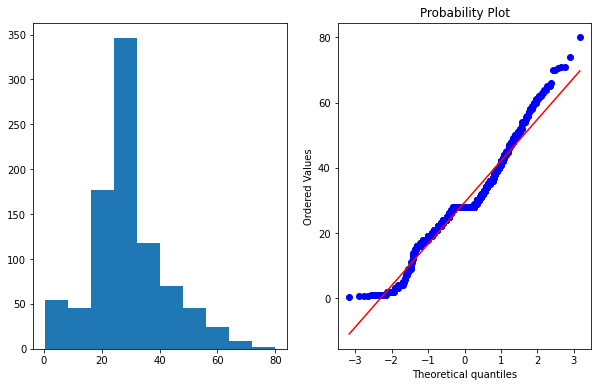

In [49]:
plot_data(df, 'Age')

### logarithmic transformation

In [51]:
import numpy as np
df['Age_log'] = np.log(df['Age'])

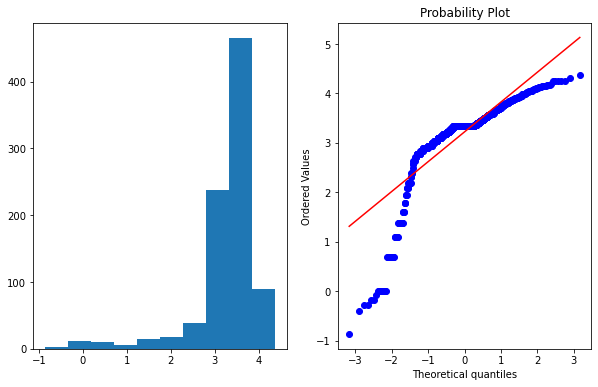

In [53]:
plot_data(df,'Age_log')

### reciprocal transformation

In [54]:
df['Age_reciprocal'] =1/ df['Age']

In [55]:
df.head()

,Survived,Age,Fare,Age_log,Age_reciprocal
0,0,22.0,7.2500,3.091042,0.045455
1,1,38.0,71.2833,3.637586,0.026316
2,1,26.0,7.9250,3.258097,0.038462
3,1,35.0,53.1000,3.555348,0.028571
4,0,35.0,8.0500,3.555348,0.028571


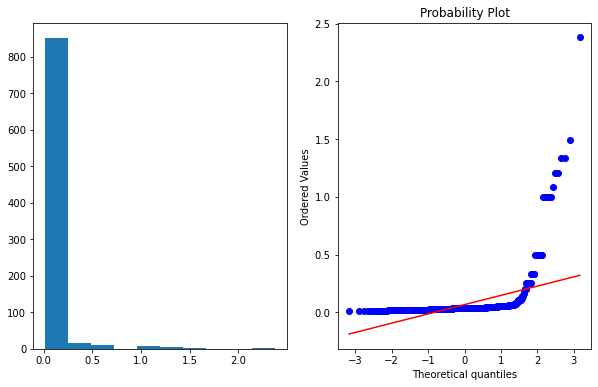

In [57]:
plot_data(df,'Age_reciprocal')

### square root transformation

In [59]:
df['Age_sqrt'] = np.sqrt(df['Age'])

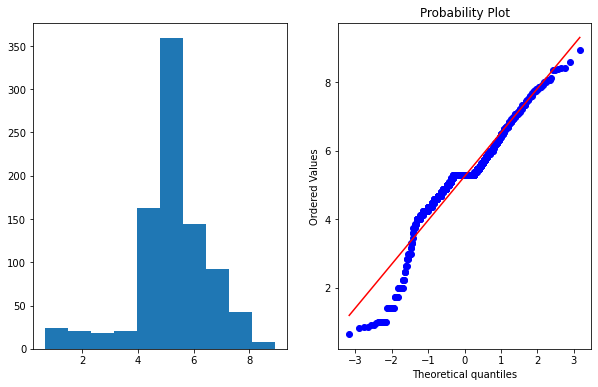

In [60]:
plot_data(df,'Age_sqrt')

### exponential transformation

In [65]:
df['Age_exp'] = df['Age']**(1/1.2)

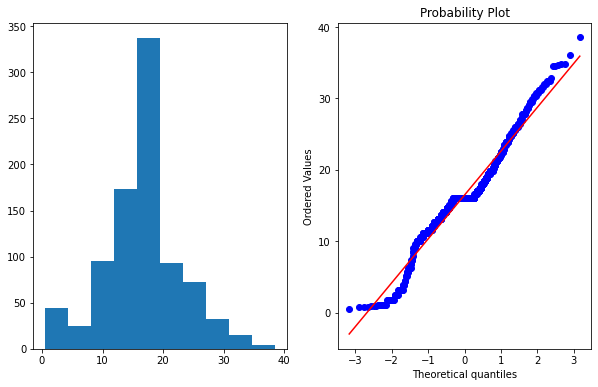

In [66]:
plot_data(df,'Age_exp')

### boxcox transformation

In [71]:
df['Age_boxcox'], parameters = stat.boxcox(df['Age'])

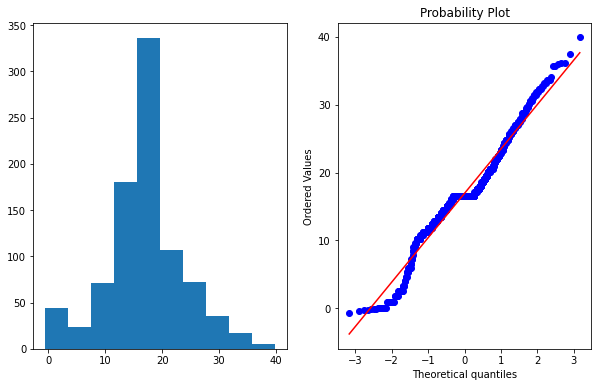

In [73]:
plot_data(df,'Age_boxcox')